# IMPORTS

In [1]:
# importing all the imports needed for this phase
# data manipulation
import pandas as pd
import numpy as np

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# personal import
import acquire as a
import prepare as p
import explore as e
import env
import MODEL as m


#stats import
from scipy import stats

# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ACQUIRE

In [2]:
# getting data from SQL
df =a.get_telco_data()

this file exists, reading csv


In [3]:
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,2,1,2,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
0003-MKNFE,1,2,1,1,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
0004-TLHLJ,2,1,2,1,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
0011-IGKFF,3,1,2,1,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
0013-EXCHZ,4,2,2,1,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.shape

(7043, 24)

>there are 7043 rows and 24 columns

### peronsal opinion on data

important
> gender
> tenure
> senior
> monthly

unimportant
> payment_type_id
> internet_service_type
> Unamed: 0
> customer_id ( theres already an index)  

# PREPARE

In [5]:
df = p.prep_telco(df)

In [6]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,streaming_tv,streaming_movies,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,has_add_ons
customer_id,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,Yes,No,65.6,593.30,No,One year,DSL,Mailed check,1
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,Yes,59.9,542.40,No,Month-to-month,DSL,Mailed check,0
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1
0011-IGKFF,Male,1,Yes,No,13,Yes,No,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,1
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Yes,No,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1


### changes to data
>this  function takes in the telco database and cleans it
>turns total charges into a float
>combined 'online_security', 'online_backup', 'device_protection', 'tech_support' into 1 column called add ons
#### deletes
>payment type id
>internet service id
>contract type id
>customer id


# PREPROCESS

In [7]:
encoded_df = p.preprocess_data(df)

#### function description
>Preprocesses the data by encoding various features into binary format and removing the original columns.
#### changes
>Internet Service Encoding
>Binary Conversion for Specific Services
>Contract Type Encoding
>Automatic Payment Encoding
>Yes/No Features Conversion
>Gender Encoding
>Churn Encoding
>Dropping Original Columns

In [8]:
# creating 2 variables and printing columns with function
cat_var, cont_var = p.categorize_columns(encoded_df)

'senior_citizen': [0 1]
'partner': [1 0]
'dependents': [1 0]
'tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
'phone_service': [1 0]
'multiple_lines': [0 1]
'streaming_tv': [1 0]
'streaming_movies': [0 1]
'monthly_charges': [65.6  59.9  73.9  ... 91.75 68.8  67.85]
'total_charges': [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
'churn': [0 1]
'has_add_ons': [1 0]
'has_internet': [1]
'monthly_contract': [0 1]
'automatic_payment': [0 1]
'is_male': [0 1]


### data splitting

In [9]:
# splitting the data
train, validate, test = p.splitting_data(encoded_df, 'churn')

In [10]:
# checking out new variable
train.shape, validate.shape, test.shape

((4219, 16), (1406, 16), (1407, 16))

# EXPLORE / HYPOTHESISE


### does monthly charges affect the the if people churn or not?

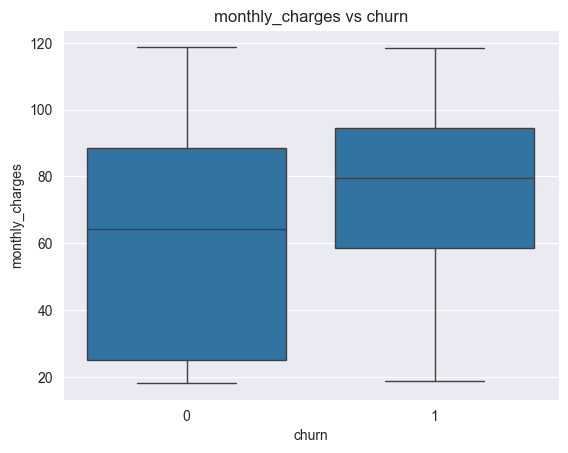

Performing T-test:

H0: There is NO difference in means of monthly_charges across different categories of churn
Ha: There IS a difference in means of monthly_charges across different categories of churn

Reject the null hypothesis. The p-value is 1.0911669104936564e-37, which is less than alpha 0.05.
There is a statistically significant difference in monthly_charges across different categories of churn.


In [11]:
# using created function to get hypothesis, graph and test P for categorical and continous variables
e.continuous_categorical_relationship(train, 'monthly_charges', 'churn')

### Does the customer column “senior_citizen” affect whether or not someone churn?

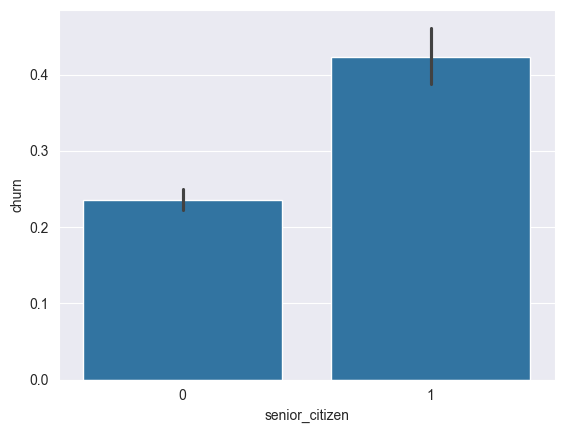

Crosstab between senior_citizen and churn:
churn              0    1
senior_citizen           
0               2708  835
1                390  286

H0: There is NO relationship between senior_citizen and churn
Ha: There IS a relationship between senior_citizen and churn

Reject the null hypothesis. My p-value is 8.206605132251275e-24, which is less than alpha 0.05.
We can conclude that there is a relationship between senior_citizen and churn.


In [12]:
# using created function to get hypothesis, graph and test P for categorical variables
e.categorical_relationship(train, 'senior_citizen', 'churn')

### Does the customer column "automatic_payment" affect whether or not someone churn?

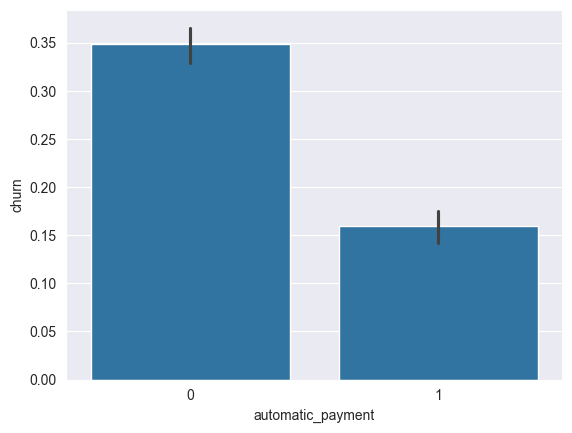

Crosstab between automatic_payment and churn:
churn                 0    1
automatic_payment           
0                  1543  826
1                  1555  295

H0: There is NO relationship between automatic_payment and churn
Ha: There IS a relationship between automatic_payment and churn

Reject the null hypothesis. My p-value is 3.802293916720818e-43, which is less than alpha 0.05.
We can conclude that there is a relationship between automatic_payment and churn.


In [13]:
# using created function to get hypothesis, graph and test P for categorical variables
e.categorical_relationship(train, 'automatic_payment','churn')

### Does the customer column “monthly_payment” affect whether or not someone churn?

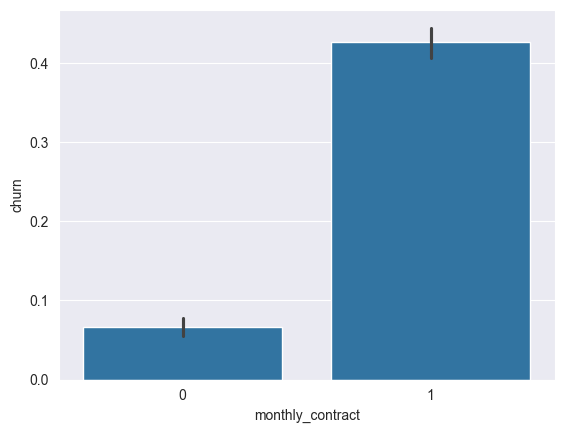

Crosstab between monthly_contract and churn:
churn                0    1
monthly_contract           
0                 1755  124
1                 1343  997

H0: There is NO relationship between monthly_contract and churn
Ha: There IS a relationship between monthly_contract and churn

Reject the null hypothesis. My p-value is 3.1344622282037087e-152, which is less than alpha 0.05.
We can conclude that there is a relationship between monthly_contract and churn.


In [14]:
# using created function to get hypothesis, graph and test P for categorical variables
e.categorical_relationship(train, 'monthly_contract', 'churn')

My p-value is less than alpha, therefore, we reject the null hypothesis.
we can conclude that there is a relationship between monthly_contract and churn.

## CONCLUSION

We saw there was a relationship between passenger senior_citizen, monthly_contract, automatic_payment, monthly_charges and whether or not they churned.


# MODEL 

#### BASELINE

In [15]:
# creating baseline prediction
1 - train['churn'].mean() 

0.7342972268310026

for baseline prediction i said the every customer would not churn which gave me a 73%

for my model after trying out different models i decided my best model for the problem at hand would be a decision tree 


In [19]:
# creating and fitting the models
tree, X_train, y_train, y_pred_train =m.create_fit_predict_model(train,3,10)
tree, X_val, y_val, y_pred_val = m.create_fit_predict_model(validate,3,10)

In [20]:
# now trying out many different max depth to see which one gives best result on the train and validate
for x in range(1,14):
    #create the object
    tree = DecisionTreeClassifier(max_depth=x,min_samples_leaf=10)
    
    #fit the object
    tree.fit(X_train, y_train) 
    
    #calculate the accuracy for train
    acc = tree.score(X_train, y_train)
    
    #calculate the accuracy for validate
    acc_v = tree.score(X_val, y_val)
    
    print(f'max depth of {x}, the accuracy train = {round(acc,2)}, val = {round(acc_v,2)}')

max depth of 1, the accuracy train = 0.73, val = 0.73
max depth of 2, the accuracy train = 0.76, val = 0.75
max depth of 3, the accuracy train = 0.79, val = 0.79
max depth of 4, the accuracy train = 0.79, val = 0.8
max depth of 5, the accuracy train = 0.8, val = 0.8
max depth of 6, the accuracy train = 0.8, val = 0.8
max depth of 7, the accuracy train = 0.81, val = 0.79
max depth of 8, the accuracy train = 0.82, val = 0.78
max depth of 9, the accuracy train = 0.83, val = 0.78
max depth of 10, the accuracy train = 0.83, val = 0.77
max depth of 11, the accuracy train = 0.84, val = 0.78
max depth of 12, the accuracy train = 0.84, val = 0.77
max depth of 13, the accuracy train = 0.84, val = 0.77


max depth 5 turned out to be the best model

# max depth 5 and sample leaf 10

In [26]:
tree, X_test, y_test, y_pred_test = m.create_fit_predict_model(test,5,10)

In [27]:
# creating the accuracy score for test
acc_test = tree.score(X_test, y_test)

In [29]:
round(acc_test, 2)

0.81

i got a 81% on the test which is higher then the basline accuracy of 73%

# CONCLUSION

here are some ideas to possibly lower the churn rate. 

Senior Citizens:
>Tailored Communication: Customize communication and support for senior citizens. This could include clearer, larger print on bills and correspondence, or a dedicated support line.
    
Monthly Contracts:
>Incentivize Longer Contracts: Offer incentives for customers to switch from monthly to longer-term contracts, such as annual plans. These could be discounts, additional features, or loyalty rewards.
    
Automatic Payment Methods:
>Promote Automatic Payments: Encourage customers to use automatic payment methods by offering discounts or additional benefits. Make sure the process of setting up automatic payments is simple and secure.

with more time i would...
>look at more variables
>create different models 
>look up more possible way to fix the cause of the problems

with the model created right now we can identify high risk customers now and for the future and send special offers depending on the category they fall in